Mean Squared Error: 21910.936433489635


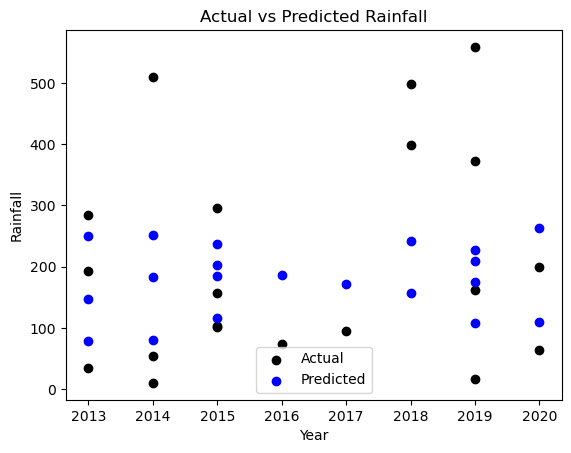

Predicted Rainfall for the Next 3 Years:
    Year  Month  Predicted Rainfall
0   2021      1           94.227661
1   2021      2          111.290537
2   2021      3          128.353412
3   2021      4          145.416288
4   2021      5          162.479164
5   2021      6          179.542039
6   2021      7          196.604915
7   2021      8          213.667791
8   2021      9          230.730666
9   2021     10          247.793542
10  2021     11          264.856418
11  2021     12          281.919293
12  2022      1           96.143591
13  2022      2          113.206466
14  2022      3          130.269342
15  2022      4          147.332218
16  2022      5          164.395093
17  2022      6          181.457969
18  2022      7          198.520845
19  2022      8          215.583720
20  2022      9          232.646596
21  2022     10          249.709472
22  2022     11          266.772347
23  2022     12          283.835223
24  2023      1           98.059520
25  2023      2        

In [1]:
 

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset
# Assuming your dataset is in a CSV file named 'rainfall_data.csv'
data = pd.read_csv('Galle.csv')

# Assuming the dataset has columns 'Year', 'Month', and 'Rainfall'
# Extract features and target variable
X = data[['Year', 'Month']]
y = data['Rainfall']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize the predictions
plt.scatter(X_test['Year'], y_test, color='black', label='Actual')
plt.scatter(X_test['Year'], y_pred, color='blue', label='Predicted')
plt.xlabel('Year')
plt.ylabel('Rainfall')
plt.title('Actual vs Predicted Rainfall')
plt.legend()
plt.show()

# Creating a future dataset for the next 3 years
future_years = [2021, 2022, 2023]
future_months = range(1, 13)
future_data = pd.DataFrame([(year, month) for year in future_years for month in future_months], columns=['Year', 'Month'])

# Save the future_data to an Excel file
future_data.to_excel('future_data_predictions.xlsx', index=False)

# Now, you can use the trained model to predict rainfall for the next 3 years
# Assuming you have a new dataset named 'future_data' with columns 'Year' and 'Month'
future_data = pd.read_excel('future_data_predictions.xlsx')

# Make predictions for the future data
future_data['Predicted Rainfall'] = model.predict(future_data[['Year', 'Month']])

# Save the predicted data to an Excel file
future_data.to_excel('predicted_rainfall_next_3_years.xlsx', index=False)

# Print the predicted rainfall for the next 3 years
print('Predicted Rainfall for the Next 3 Years:')
print(future_data[['Year', 'Month', 'Predicted Rainfall']])
